In [1]:
import numpy as np
import tensorflow as tf
from skimage import io
from skimage import transform
import skimage
import matplotlib.pyplot as plt
from main_helpers import load_vgg16, get_noisy_img, compute_content_cost, compute_style_cost, total_cost

In [2]:
HEIGHT = 224
WIDTH = 224
CHANNELS = 3
NOISE_RATIO = 0.4

source_img = io.imread('images/source.jpg')
source_img = (np.reshape(transform.resize(source_img, (HEIGHT, WIDTH), mode='constant',
                                preserve_range=False, anti_aliasing=True), [1, HEIGHT, WIDTH, CHANNELS]))
painting_img = io.imread('images/van_gogh.jpg')
painting_img = (np.reshape(transform.resize(painting_img, (HEIGHT, WIDTH), mode='constant',
                                preserve_range=False, anti_aliasing=True), [1, HEIGHT, WIDTH, CHANNELS]))

result_img = NOISE_RATIO*get_noisy_img(source_img.shape) + (1-NOISE_RATIO)*source_img
source_img[0] = skimage.img_as_float64(source_img[0])
painting_img = skimage.img_as_float64(painting_img)

In [3]:
get_noisy_img(source_img.shape)

array([[[[0.69501006, 0.30770919, 0.0437226 ],
         [0.77269826, 0.78237967, 0.2928436 ],
         [0.48041546, 0.41321145, 0.21809423],
         ...,
         [0.34799964, 0.82453294, 0.39348971],
         [0.76919336, 0.83412684, 0.51775794],
         [0.95036662, 0.06024076, 0.4839771 ]],

        [[0.74685876, 0.91636115, 0.42530004],
         [0.08427354, 0.56644409, 0.87891277],
         [0.63623032, 0.08695246, 0.52263638],
         ...,
         [0.65905815, 0.73219573, 0.6548818 ],
         [0.08078677, 0.07582417, 0.3371309 ],
         [0.90497822, 0.36370564, 0.08504781]],

        [[0.96830736, 0.99278033, 0.54449643],
         [0.34772519, 0.80498604, 0.34331251],
         [0.84525031, 0.71437632, 0.61737881],
         ...,
         [0.38132199, 0.84261023, 0.75005835],
         [0.39227312, 0.99945545, 0.37447023],
         [0.19692103, 0.1798092 , 0.26868619]],

        ...,

        [[0.16422183, 0.01918991, 0.70635524],
         [0.61908516, 0.25506089, 0.69219889]

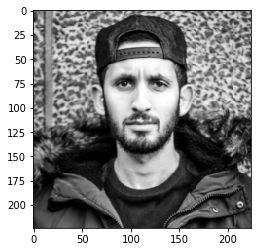

In [4]:
plt.imshow(source_img[0])

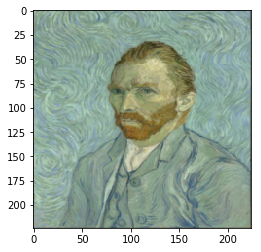

In [5]:
plt.imshow(painting_img[0])

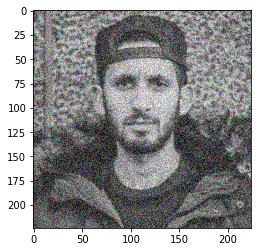

In [6]:
plt.imshow(result_img[0])

In [7]:
STYLE_LAYERS = [
    ('conv1_1', 0.2),
    ('conv2_1', 0.2),
    ('conv3_1', 0.2),
    ('conv4_1', 0.2),
    ('conv5_1', 0.2)]

In [22]:
tf.reset_default_graph()
model = load_vgg16()
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()

In [23]:
sess.run(model['input'].assign(source_img))

out = model['conv3_2']

a_C = sess.run(out)
a_G = out

Jc = compute_content_cost(a_C, a_G)

sess.run(model['input'].assign(painting_img))

Jp = compute_style_cost(sess, model, STYLE_LAYERS)
J = total_cost(Jc, Jp, alpha = 1, beta = 4)

optimizer = tf.train.AdamOptimizer(0.5)
train_step = optimizer.minimize(J)

In [24]:
def model_nn(input_image, num_iterations = 200):
    sess.run(tf.global_variables_initializer())
    sess.run(model['input'].assign(input_image))

    for i in range(num_iterations):
        _ = sess.run(train_step)
        result_img = sess.run(model['input'])
        if i % 20 == 0:
            J_t, J_c, J_p = sess.run([J, Jc, Jp])
            print("Iteration " + str(i) + " :")
            print(J_t)
            #to_save = skimage.img_as_int(result_img[0])
            #print(to_save)
            #io.imsave("output/"+ str(i) +".png", to_save)
    io.imsave("output/final.png", result_img[0])
    return result_img

In [25]:
model_nn(result_img, num_iterations=60)
sess.close()

Iteration 0 :
inf
Iteration 20 :
nan
Iteration 40 :
nan


/usr/local/lib/python3.5/dist-packages/numpy/core/_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)
/usr/local/lib/python3.5/dist-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)
/usr/local/lib/python3.5/dist-packages/numpy/lib/function_base.py:4291: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/usr/local/lib/python3.5/dist-packages/skimage/util/dtype.py:130: UserWarning: Possible precision loss when converting from float32 to uint8
  .format(dtypeobj_in, dtypeobj_out))
